In [1]:
%matplotlib inline

# CSG Survey Data Analysis

## Bias Assessment II

In [2]:
import os
import collections
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
file_path = 'bias-2'
in_file = 'bias_data_csv.csv'
plt.style.use('default') #https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

In [3]:
def create_heatmap_from_matrix(matrix_name, filename, color='Blues'):
    sns.set(rc={"figure.figsize":(12,8)})
    df = pd.DataFrame(matrix_name)
    g = sns.heatmap(df, annot=True, fmt='g', cmap=color)
    g.get_figure().savefig(os.path.join(file_path, filename))
    
def create_stackedbar_chart(matrix, filename, barcolor='default'):
    if barcolor == 'default':
        matrix.plot.bar(stacked=True)#.patch.set_visible(False)
    else:
        matrix.plot.bar(stacked=True, color=barcolor)
    plt.savefig(os.path.join(file_path, filename))
    
def get_chi2_pval(dataframe, col_list):
    chi_input = []
    for index, row in dataframe.iterrows():
        chi_input.append([row[i] for i in col_list])
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(chi_input)
    return round(p_val, 3)

def get_fisher_pval(dataframe, col_list):
    fet_input = []
    for index, row in dataframe.iterrows():
        fet_input.append([row[i] for i in col_list])
    oddsratio, pvalue = stats.fisher_exact(fet_input)
    return round(pvalue, 3)

In [4]:
def response2bias_overview(input_file):
    ''''''
    survey_data = pd.read_csv(input_file, sep='\t') #, index_col='nationality2')
    bias_response = survey_data.groupby(
        ['reported2_yn', 'reported2_desc']).size().unstack().fillna(0)
    response_type = survey_data.groupby(
        ['reporttype2_yn', 'reporttype2_desc']).size().unstack().fillna(0)
    reported_to_handler = survey_data.groupby(
        ['designated2', 'reported2_yn']).size().unstack().fillna(0)
    response_vs_designated_handler = survey_data.groupby(
        ['designated2', 'response2']).size().unstack().fillna(0)
    position_vs_response = survey_data.groupby(
        ['designation', 'reported2_yn']).size().unstack().fillna(0)
    gender_vs_response = survey_data.groupby(
        ['gender', 'reported2_yn']).size().unstack().fillna(0)
    nationality_vs_response = survey_data.groupby(
        ['nationality2', 'reported2_yn']).size().unstack().fillna(0)
    residence_vs_response = survey_data.groupby(
        ['residence2', 'reported2_yn']).size().unstack().fillna(0)
    residence_vs_designated_handler = survey_data.groupby(
        ['residence2', 'designated2']).size().unstack().fillna(0)
    report_vs_comfort = survey_data.groupby(
        ['reported2_yn', 'comfort']).size().unstack().fillna(0)
    positive_outcome = survey_data.groupby([
        'positiveimpact2', 'designated2'])
    negative_outcome = survey_data.groupby([
        'negativeimpact2', 'designated2'])
    return (bias_response, response_type, reported_to_handler, 
            response_vs_designated_handler, position_vs_response,
           gender_vs_response, nationality_vs_response,
           residence_vs_response, residence_vs_designated_handler,
           report_vs_comfort, positive_outcome, negative_outcome)
# data_overview(in_file)

In [5]:
## Column details:
# Did you personally respond to the incident?: reported2_yn, reported2_desc
# Did you report the issue to the appropriate authority?: reporttype2_yn,reporttype2_desc
# Who is responsible for addressing such complaints in your work environment?: designated2
# How seriously were your complaints taken?: response2
# How comfortable were you in objecting against and/or reporting this issue?: comfort
# Was there any POSITIVE impact/outcome from reporting the incident?: positiveimpact2
# Was there any NEGATIVE impact/outcome from reporting the incident?: negativeimpact2
def bias2_report_data(input_file):
    ''''''
    csv_data = pd.read_csv(input_file, sep='\t')
    bias_response_info = csv_data.groupby([
        'gender', 'residence2', 'reported2_yn'])
    bias_responder_info = csv_data.groupby([
        'reported2_yn', 'designation', 
        'reported2_desc'])
    report_handler_info = csv_data.groupby([
        'designated2', 'residence2', 
        'reporttype2_yn'])
    action_received_info = csv_data.groupby([
        'reported2_yn', 'gender', 
        'designation', 'response2'])
    responder_comfort_info = csv_data.groupby([
        'gender', 'designation', 'comfort'])
    target_vs_responders = csv_data.groupby([
        'all_bias_target', 'reported2_yn', 'gender'])
    witness_vs_responders = csv_data.groupby([
        'all_bias_witness', 'reported2_yn', 'gender'])
    responder_vs_handler = csv_data.groupby(['reported2_yn', 
        'reporttype2_desc', 'gender'])
    positive_outcome = csv_data.groupby([
        'gender', 'positiveimpact2'])
    negative_outcome = csv_data.groupby([
        'gender', 'negativeimpact2'])
    positive_outcome2 = csv_data.groupby([
        'reported2_yn', 'positiveimpact2'])
    negative_outcome2 = csv_data.groupby([
        'reported2_yn', 'negativeimpact2'])
    comfort_vs_designation = csv_data.groupby([
        'comfort', 'designation'])
    comfort_vs_pos_outcome = csv_data.groupby([
        'comfort', 'positiveimpact2'])
    comfort_vs_neg_outcome = csv_data.groupby([
        'comfort', 'negativeimpact2'])
    comfort_gender_vs_designation = csv_data.groupby([
        'gender', 'designation', 'comfort'])
    bias_responder_gender_info = csv_data.groupby([
        'reported2_yn', 'gender', 
        'reported2_desc'])
    return (bias_response_info, bias_responder_info,
            report_handler_info, action_received_info,
            responder_comfort_info, target_vs_responders,
            witness_vs_responders, responder_vs_handler,
            positive_outcome, negative_outcome, 
            positive_outcome2, negative_outcome2,
            comfort_vs_designation, comfort_vs_pos_outcome, 
            comfort_vs_neg_outcome, comfort_gender_vs_designation,
            bias_responder_gender_info)
response_to_bias_data = bias2_report_data(in_file)

### Figure 1:

Bar chart showing the the different responses to bias incidents experienced by the 219 survey respondents. The bar for ‘na’ (black) shows the proportion of respondents who stated that they never faced any bias incident. 

reported2_yn                                          na    no   yes
reported2_desc                                                      
na                                                  50.0   0.0   0.0
no, I did not bother.                                0.0  12.0   0.0
no, I did not know how to respond so I let it p...   0.0  43.0   0.0
no, I was afraid of furthering the issue.            0.0  25.0   0.0
no, I was discouraged from responding to the in...   0.0  11.0   0.0
yes, I immediately responded.                        0.0   0.0  40.0
yes, but I responded later.                          0.0   0.0  38.0
P-value resulted from chi-square test is 0.0
Total response for this analysis is 219.0


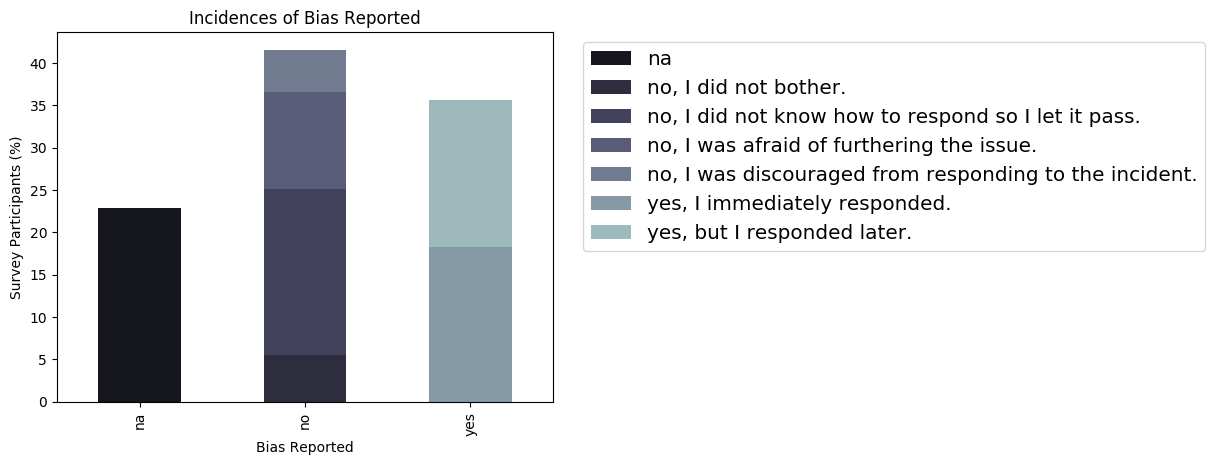

In [6]:
plt.style.use('default')
response2bias = response2bias_overview(in_file)
bias_response = response2bias[0]
bias_response_perc = round(bias_response*(100/bias_response.sum().sum()), 2)
print(bias_response.T)

colors = plt.cm.bone(np.linspace(0.1, 5))
bias_response_perc.plot.bar(stacked=True, color=colors)

col_list = ['na', 'no', 'yes']
pvalue = get_chi2_pval(bias_response.T, col_list)
print("P-value resulted from chi-square test is %s" % pvalue)

plt.xlabel('Bias Reported')
plt.ylabel('Survey Participants (%)')
plt.title('Incidences of Bias Reported')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize = 'x-large')
plt.savefig(os.path.join(file_path, 'bias_response_bar.png'))

print(f'Total response for this analysis is {bias_response.sum().sum()}')

### Figuere 2a

reported2_yn          na      no     yes
gender residence2                       
Female America     7.339  17.890  12.385
       India       3.670   8.716  10.550
       RoW         2.294   7.339   3.670
Male   America     5.505   3.670   4.128
       India       0.917   2.752   2.752
       RoW         3.211   1.376   1.835
P-value resulted from chi-square test is 0.043
Total response for this analysis is 218.0


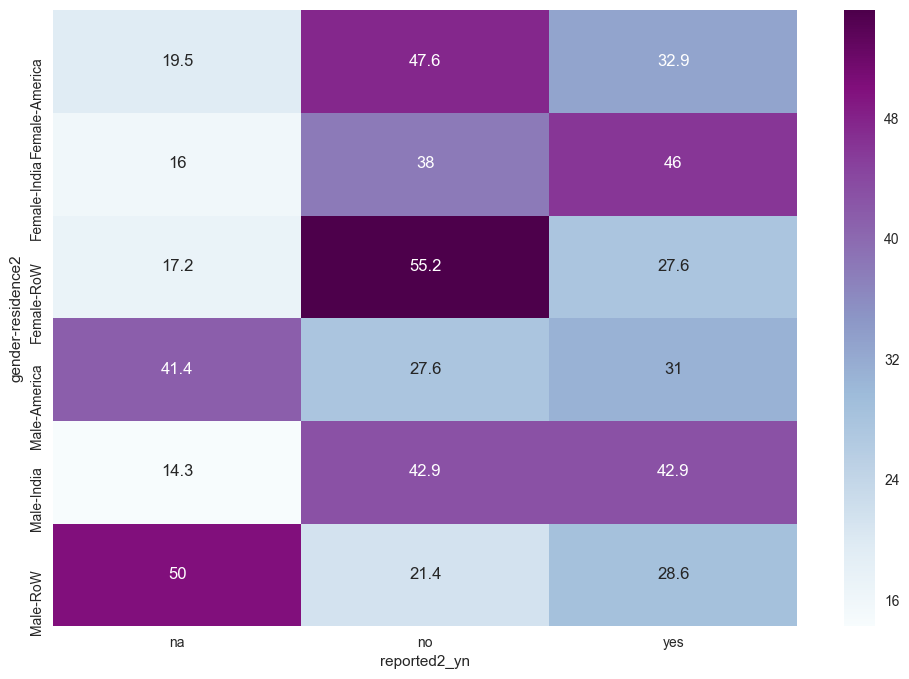

In [7]:
bias_response_info = response_to_bias_data[0].size().drop(
    'Prefer not to say', level = 1).unstack().fillna(0).drop(['Prefer not to say'], level = 0)
bias_response_info_100perc =  round(bias_response_info.div(
    bias_response_info.sum(1), axis=0), 3)*100

bias_response_info_perc =  round(bias_response_info*(
    100/bias_response_info.sum().sum()), 3)

print(bias_response_info_perc) #, bias_response_info_100perc)

col_list = ['na', 'no', 'yes']
pvalue = get_chi2_pval(bias_response_info, col_list)
print("P-value resulted from chi-square test is %s" % pvalue)

create_heatmap_from_matrix(bias_response_info_100perc, 
                           "bias_response_info_100.png", color='BuPu')
print(f'Total response for this analysis is {bias_response_info.sum().sum()}')

### Figure 2b

reported2_yn                                          na    no   yes
reported2_desc                                                      
na                                                  50.0   0.0   0.0
no, I did not bother.                                0.0  12.0   0.0
no, I did not know how to respond so I let it p...   0.0  43.0   0.0
no, I was afraid of furthering the issue.            0.0  25.0   0.0
no, I was discouraged from responding to the in...   0.0  11.0   0.0
yes, I immediately responded.                        0.0   0.0  40.0
yes, but I responded later.                          0.0   0.0  38.0
P-value resulted from chi-square test is 0.0
Total response for this analysis is 219.0


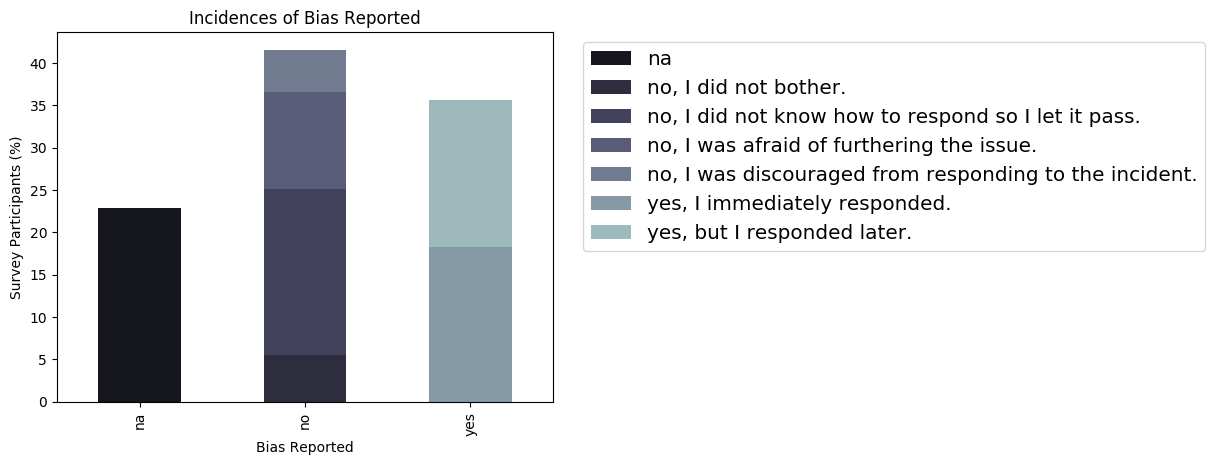

In [8]:
plt.style.use('default')
response2bias = response2bias_overview(in_file)
bias_response = response2bias[0]
bias_response_perc = round(bias_response*(100/bias_response.sum().sum()), 2)
print(bias_response.T)

colors = plt.cm.bone(np.linspace(0.1, 5))
bias_response_perc.plot.bar(stacked=True, color=colors)

col_list = ['na', 'no', 'yes']
pvalue = get_chi2_pval(bias_response.T, col_list)
print("P-value resulted from chi-square test is %s" % pvalue)

plt.xlabel('Bias Reported')
plt.ylabel('Survey Participants (%)')
plt.title('Incidences of Bias Reported')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize = 'x-large')
plt.savefig(os.path.join(file_path, 'bias_response_bar.png'))
print(f'Total response for this analysis is {bias_response.sum().sum()}')

### Figure 2c

P-value resulted from fisher exact test is 0.016
Total response for this analysis is 78.0


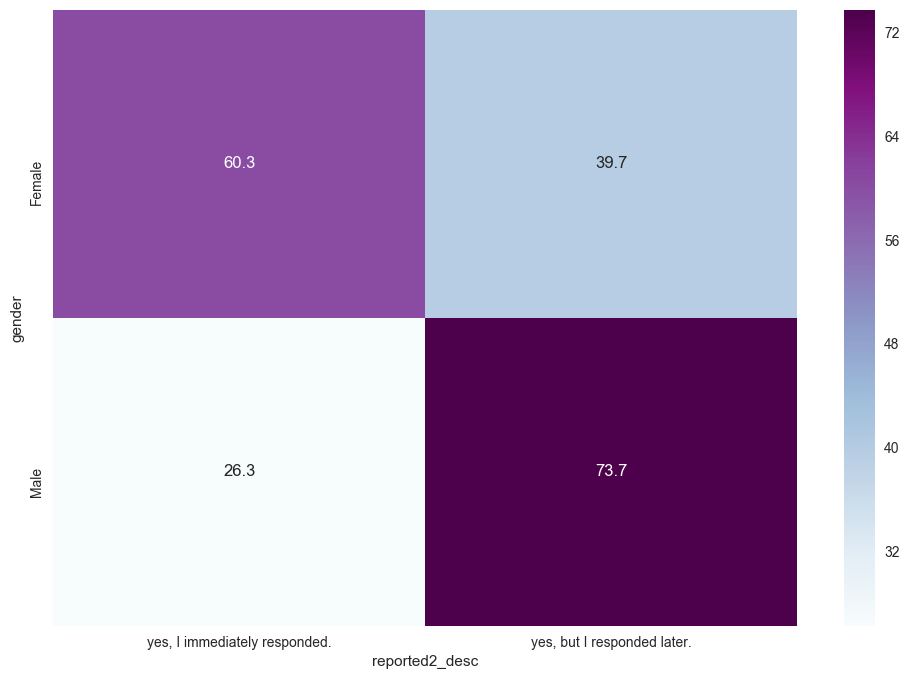

In [9]:
bias_nonresponder_gender_info = response_to_bias_data[-1].size()['yes'].unstack()
bias_nonresponder_gender_info_100perc =  round(bias_nonresponder_gender_info.div(
    bias_nonresponder_gender_info.sum(1), axis=0), 3)*100

col_list = ['Female', 'Male']
pvalue = get_fisher_pval(bias_nonresponder_gender_info.T, col_list)
print("P-value resulted from fisher exact test is %s" % pvalue)

#print(bias_responder_info) #, bias_response_info_100perc)
create_heatmap_from_matrix(bias_nonresponder_gender_info_100perc.dropna(), 
                           "bias_nonresponder_gender_info_100.png", color='BuPu')
print(f'Total response for this analysis is {bias_nonresponder_gender_info.sum().sum()}')

### Figure 2d

P-value resulted from chi-sqaure test is 0.439
Total response for this analysis is 91.0


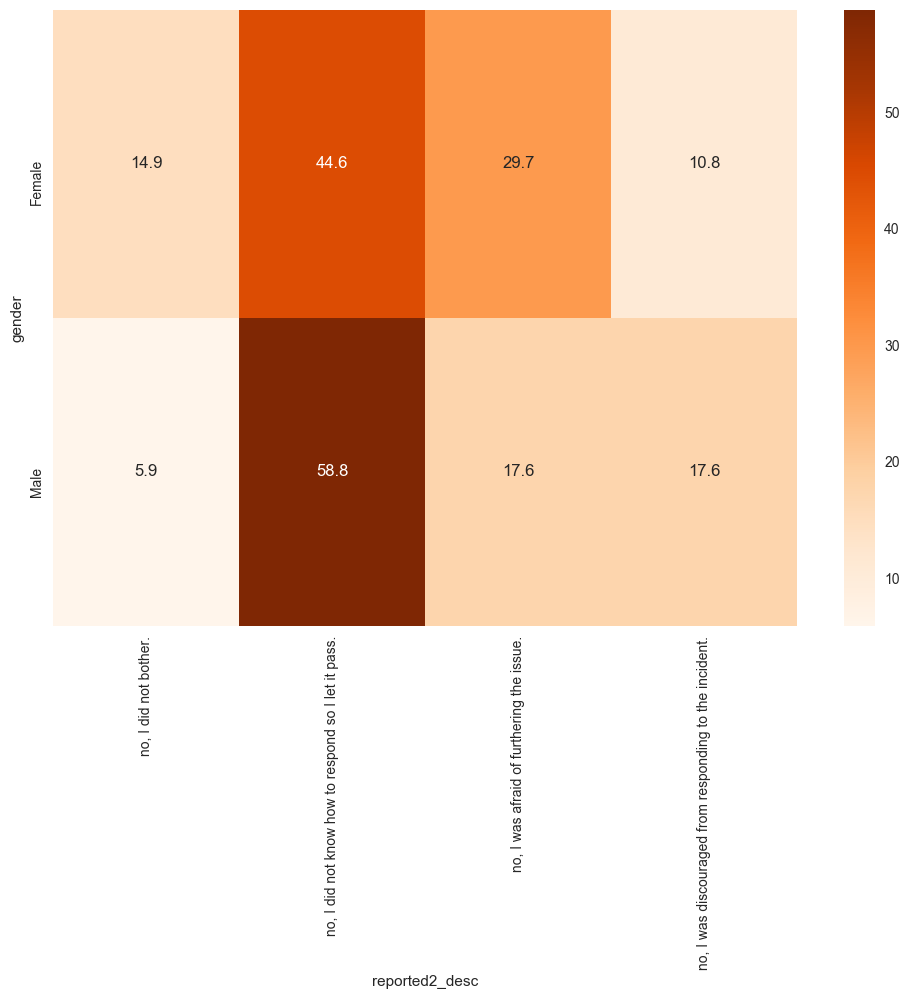

In [10]:
bias_nonresponder_gender_info = response_to_bias_data[-1].size()['no'].unstack()
bias_nonresponder_gender_info_100perc =  round(bias_nonresponder_gender_info.div(
    bias_nonresponder_gender_info.sum(1), axis=0), 3)*100

col_list = ['Female', 'Male']
pvalue = get_chi2_pval(bias_nonresponder_gender_info.T, col_list)
print("P-value resulted from chi-sqaure test is %s" % pvalue)

#print(bias_responder_info) #, bias_response_info_100perc)
create_heatmap_from_matrix(bias_nonresponder_gender_info_100perc.dropna(), 
                           "bias_nonresponder_gender_info_100.png", color='Oranges')
print(f'Total response for this analysis is {bias_nonresponder_gender_info.sum().sum()}')

### Figure 3

P-value resulted from chi-square test is 0.0
Total response for this analysis is 219


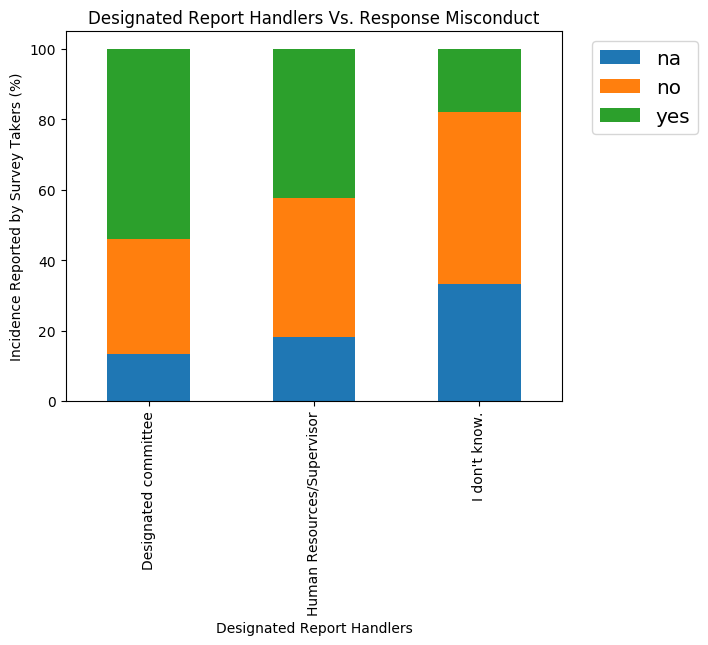

In [11]:
plt.style.use('default')
response2bias = response2bias_overview(in_file)
reported_to_handler = response2bias[2] #.drop(['na'], axis = 1)
# reported_to_handler.loc[:,'na'] *= 0 

reported_to_handler_100perc = reported_to_handler.div(
    reported_to_handler.sum(1), axis=0)*100
reported_to_handler_perc = reported_to_handler*(
    100/reported_to_handler.sum().sum())*100
reported_to_handler_100perc.plot.bar(stacked=True)
#print(reported_to_handler, reported_to_handler_perc)

col_list = ['no', 'yes']
pvalue = get_chi2_pval(reported_to_handler_100perc, col_list)
print("P-value resulted from chi-square test is %s" % pvalue)

plt.xlabel('Designated Report Handlers')
plt.ylabel('Incidence Reported by Survey Takers (%)')
plt.title('Designated Report Handlers Vs. Response Misconduct')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize = 'x-large')
plt.savefig(os.path.join(file_path, 'reported_to_handler_100_bar.png'))
print(f'Total response for this analysis is {reported_to_handler.sum().sum()}')

### Figure 4a

response2                   na  no  yes
designated2                            
Designated committee        19  20   13
Human Resources/Supervisor  39  26   18
I don't know.               54  27    3
P-value resulted from chi-square test is 0.01
Total response for this analysis is 219


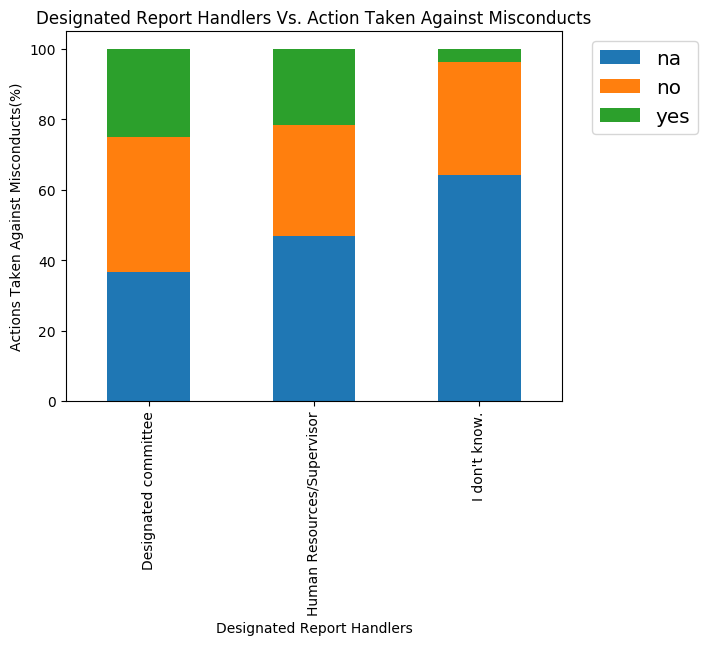

In [12]:
plt.style.use('default')
response2bias = response2bias_overview(in_file)
response_vs_designated_handler = response2bias[3] #.drop(['na'], axis = 1)
#response_vs_designated_handler.loc[:,'na'] *= 0 

response_vs_designated_handler_perc = response_vs_designated_handler.div(
    response_vs_designated_handler.sum(1), axis=0)*100
response_vs_designated_handler_perc.plot.bar(stacked=True)

print(response_vs_designated_handler) #.drop(['na'], axis = 1))

col_list = ['no', 'yes']
pvalue = get_chi2_pval(response_vs_designated_handler, col_list)
print("P-value resulted from chi-square test is %s" % pvalue)

plt.xlabel("Designated Report Handlers")
plt.ylabel('Actions Taken Against Misconducts(%)')
plt.title('Designated Report Handlers Vs. Action Taken Against Misconducts')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize = 'x-large')
plt.savefig(os.path.join(file_path, 'response_vs_designated_handler_bar.png'))
print(f'Total response for this analysis is {response_vs_designated_handler.sum().sum()}')

### Figure 4b

reported2_yn          na  no  yes
comfort                          
Not comfortable        0  65   33
Somewhat comfortable   0  14   27
Very comfortable       0   2   13
154
P-value resulted from chi-square test is 0.0
Total response for this analysis is 219


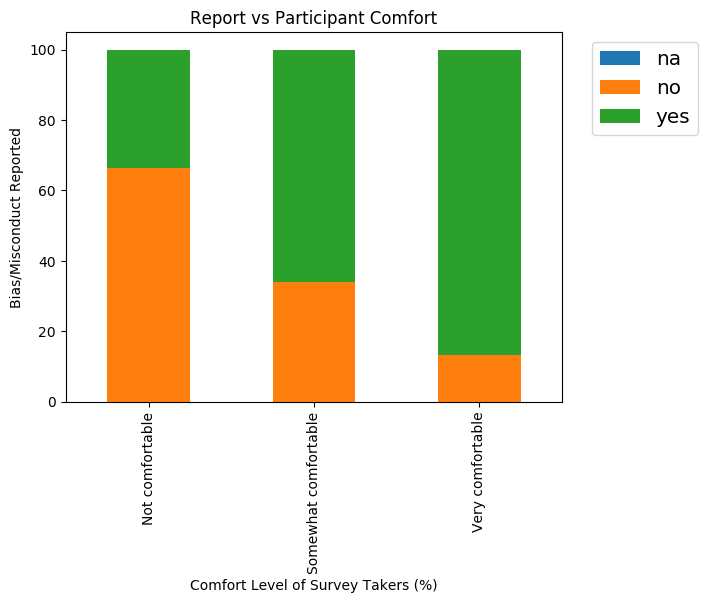

In [13]:
plt.style.use('default')
response2bias = response2bias_overview(in_file)
report_vs_comfort = response2bias[9].drop(['na'], axis = 1).T
report_vs_comfort.loc[:,'na'] *= 0 
# report_vs_comfort_perc = round(report_vs_comfort*(100/report_vs_comfort.sum().sum()), 3)
report_vs_comfort_perc = round(report_vs_comfort.div(report_vs_comfort.sum(1), axis=0), 3)*100
print(report_vs_comfort)
print(report_vs_comfort.sum().sum())

col_list = ['no', 'yes']
pvalue = get_chi2_pval(report_vs_comfort, col_list)
print("P-value resulted from chi-square test is %s" % pvalue)

colors = plt.cm.bone(np.linspace(0.2, 12))
report_vs_comfort_perc.plot.bar(stacked=True)

plt.ylabel('Bias/Misconduct Reported')
plt.xlabel('Comfort Level of Survey Takers (%)')
plt.title('Report vs Participant Comfort')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize = 'x-large')
plt.savefig(os.path.join(file_path, 'reporter_vs_comfort_bar.png'))
print(f'Total response for this analysis is {response_vs_designated_handler.sum().sum()}')

### Figure 4c

P-value resulted from fisher exact test is 0.001
positiveimpact2    no   yes
reported2_yn               
no               43.0   3.0
yes              43.0  22.0
Total response for this analysis is 111.0


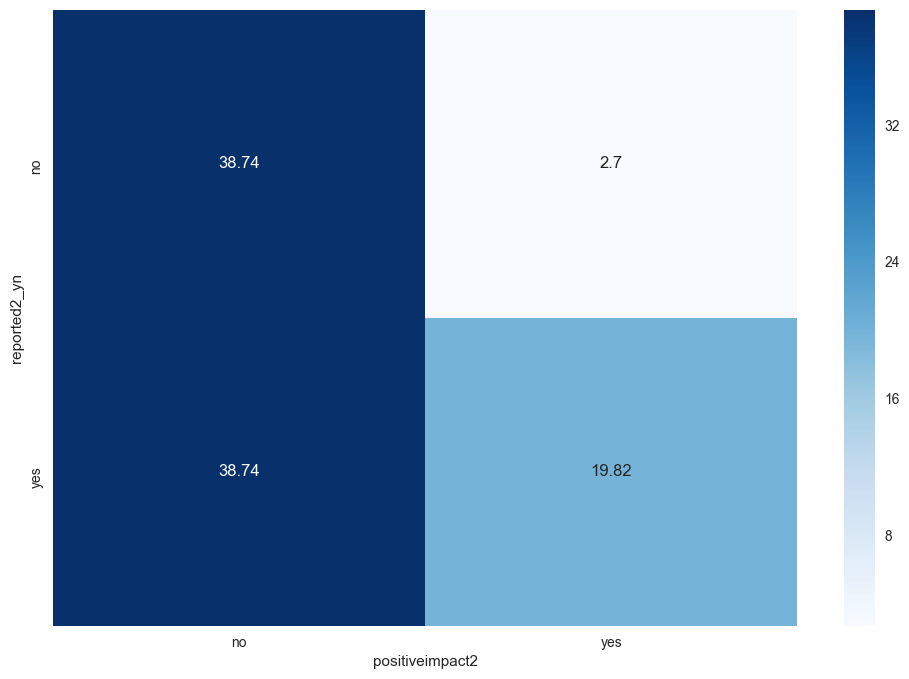

In [14]:
positive_outcome2 = response_to_bias_data[10].size(
).unstack().fillna(0).drop(['na', 'not sure'], axis = 1).drop('na')
col_list = ['no', 'yes']
pvalue = get_fisher_pval(positive_outcome2.replace(0, 0.00001), col_list)
print("P-value resulted from fisher exact test is %s" % pvalue)

positive_outcome2_100perc =  round(positive_outcome2.div(
    positive_outcome2.sum(1), axis=0), 2)

positive_outcome2_perc =  round(positive_outcome2*(
    100/positive_outcome2.sum().sum()), 2)

print(positive_outcome2)
create_heatmap_from_matrix(positive_outcome2_perc, 
                           "positive_outcome2_100.png", color='Blues')
print(f'Total response for this analysis is {positive_outcome2.sum().sum()}')

### Figure 4d

P-value resulted from fisher exact test is 0.053
negativeimpact2      no     yes
gender                         
Female           53.153  26.126
Male              9.009  11.712
Total response for this analysis is 111.0


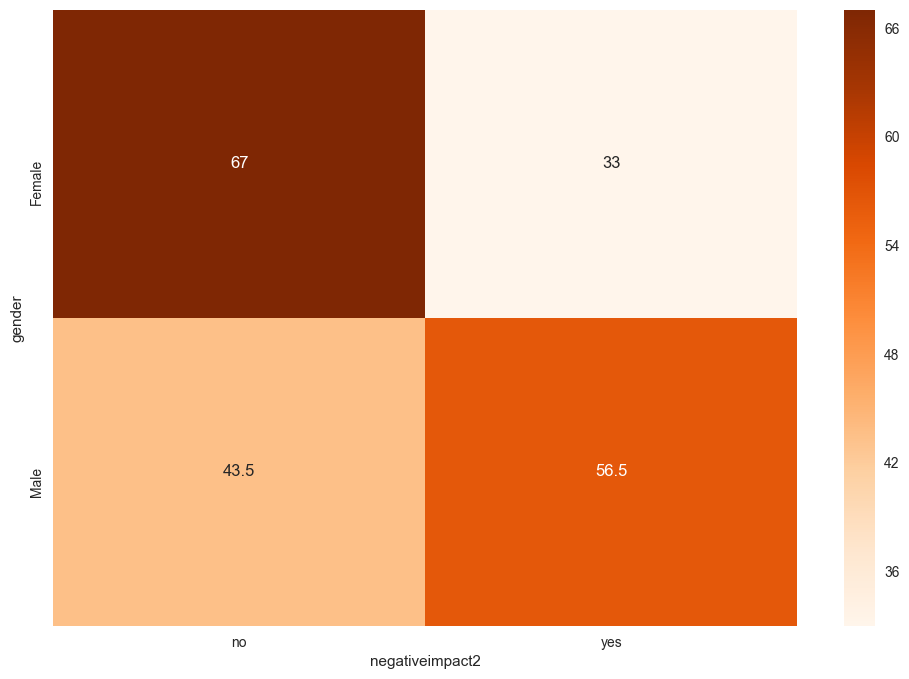

In [15]:
negative_outcome = response_to_bias_data[9].size().unstack(
).fillna(0).drop(['na'], axis = 1).drop(['Prefer not to say'], axis = 0)
col_list = ['no', 'yes']

pvalue = get_fisher_pval(negative_outcome, col_list)
print("P-value resulted from fisher exact test is %s" % pvalue)

negative_outcome_100perc =  round(negative_outcome.div(
    negative_outcome.sum(1), axis=0), 3)*100

negative_outcome_perc =  round(negative_outcome*(
    100/negative_outcome.sum().sum()), 3)
print(negative_outcome_perc)

create_heatmap_from_matrix(negative_outcome_100perc, 
                           "negative_outcome_100.png", color='Oranges')
print(f'Total response for this analysis is {negative_outcome.sum().sum()}')

### Figure 4e

P-value resulted from chi-square test is 0.0
positiveimpact2         no   yes
comfort                         
Not comfortable       65.0   3.0
Somewhat comfortable  18.0  13.0
Very comfortable       3.0  10.0
Total response for this analysis is 112.0


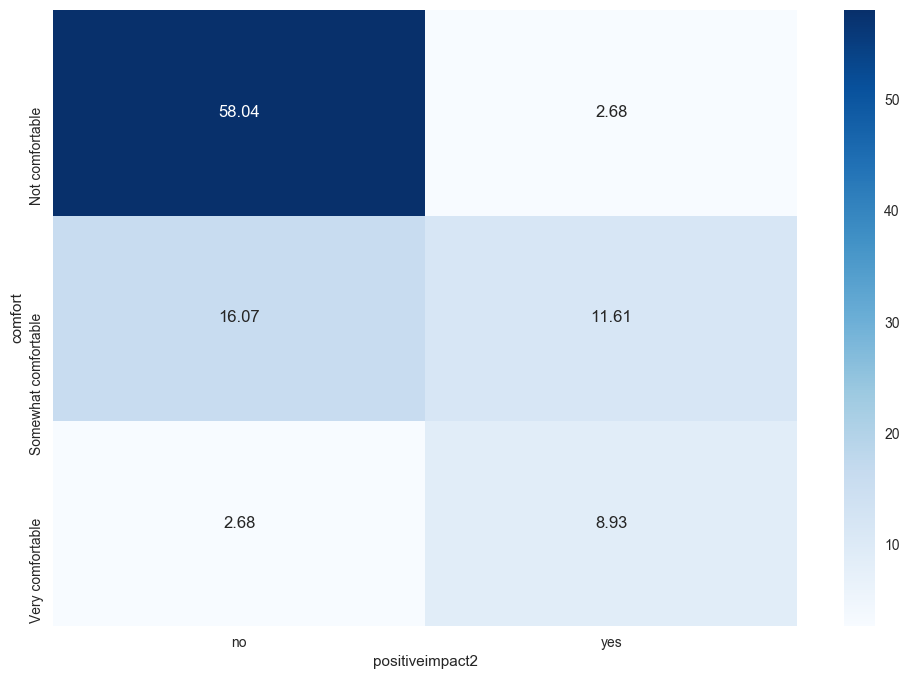

In [16]:
comfort_vs_pos_outcome = response_to_bias_data[13].size(
).drop(['not sure', 'na'], level = 1).drop(
    ['na'], axis = 0).fillna(0).unstack()

col_list = ['no', 'yes']
pvalue = get_chi2_pval(comfort_vs_pos_outcome, col_list)
print("P-value resulted from chi-square test is %s" % pvalue)

comfort_vs_pos_outcome_100perc =  round(comfort_vs_pos_outcome*(
    100/comfort_vs_pos_outcome.sum().sum()), 2)

print(comfort_vs_pos_outcome)

create_heatmap_from_matrix(comfort_vs_pos_outcome_100perc, 
                           "comfort_vs_pos_outcome_100.png", color='Blues')
print(f'Total response for this analysis is {comfort_vs_pos_outcome.sum().sum()}')

### Figure 4f

P-value resulted from chi-square test is 0.023
negativeimpact2         no   yes
comfort                         
Not comfortable       34.0  31.0
Somewhat comfortable  22.0   9.0
Very comfortable      13.0   2.0
Total response for this analysis is 111.0


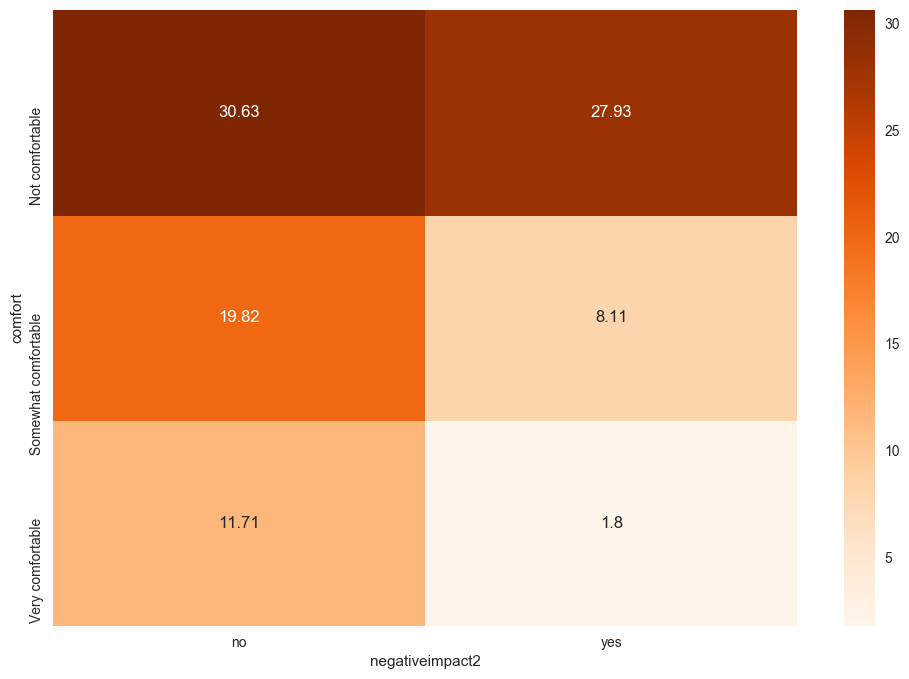

In [17]:
comfort_vs_neg_outcome = response_to_bias_data[14].size(
).drop(['na'], axis = 0).drop(['not sure', 'na'], level = 1).fillna(0).unstack() #

col_list = ['no', 'yes']
pvalue = get_chi2_pval(comfort_vs_neg_outcome, col_list)
print("P-value resulted from chi-square test is %s" % pvalue)

comfort_vs_neg_outcome_100perc =  round(comfort_vs_neg_outcome*(
    100/comfort_vs_neg_outcome.sum().sum()), 2)
print(comfort_vs_neg_outcome)

create_heatmap_from_matrix(comfort_vs_neg_outcome_100perc, 
                           "comfort_vs_neg_outcome_100.png", color='Oranges')
print(f'Total response for this analysis is {comfort_vs_neg_outcome.sum().sum()}')